## Gradient Descent in Machine Learning

It is the **Iterative optimization algorithms** to train machine learning models by **minimizing errors between actual and expected results (cost function)** by iteratively adjusting model parameters (weights) to find the lowest cost, it is also used to train Neural Networks of Deep Learning.

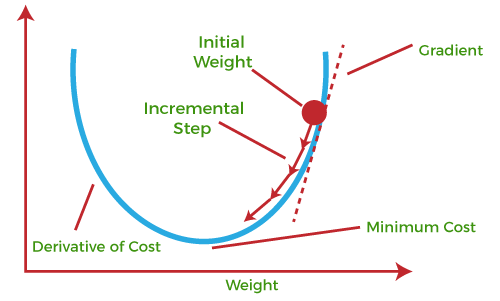

**Note:** In ML, optimization is the task of minimizing the cost function parameterized by the model's parameters (Weights and bias).

### Gradient Descent for Linear Regression:

The main objective of gradient descent is to minimize the convex function using iteration of parameter updates, to find the local minimum of a function.

#### Ques: But what is Local Minima?

The best way to define the local minimum or local maximum of a function using gradient descent is as follows:

* If we move towards a negative gradient or way from the gradient of the function at the current point, we will reach at the **local minimum** of that function.

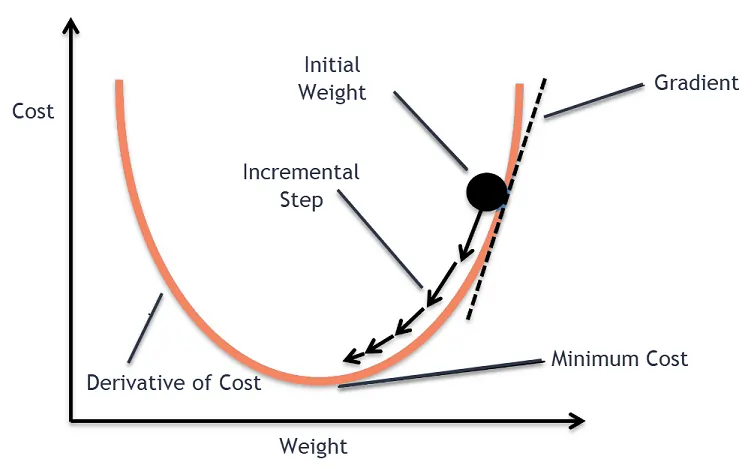

** If we move towards a positive gradient or towards the gradient of the function at the current point, we will reach at the **local maximum** of that function.

### How does Gradient Descent Work?

The main objective of using a gradient descent algorithm is to minimize the cost function using iteration. Steps taken to achieve this goal are:

**Step 1: Initialize Parameters:**

Start by randomly initializing the model's parameters (weights and biases). These parameters determine the shape of the model and its predictions.

**Step 2: Compute the Gradient:**

Calculate the gradient (derivative) of the cost function with respect to each parameter. The gradient points in the direction of the steepest ascent of the cost function.

**Step 3: Choose Learning Rate:**

Experiment with different values to find an optimal balance, as learning rate is a tuning parameter in the optimization process which helps to determine how big the steps are.

**Step 4: Update Parameters:**

Move the parameters in the opposite direction of the gradient to minimize the cost.

Update each parameter using the formula:

`( weight {new_parameter} = weight{old_parameter} - {learning_rate} * {gradient} )`

**Step 5: Repeat Iteratively:**

Iterate 2 and  4 until the cost function converges or reaches a predefined number of iterations. The learning rate controls the step size; too large can overshoot, too small can be slow.

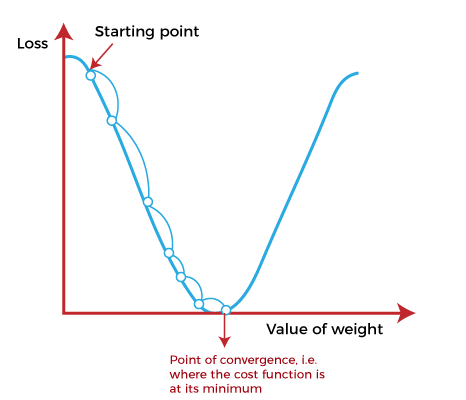

**Step 6: Convergence Check:**

Monitor the cost function during iterations. Stop when the cost reaches a satisfactory level or stops changing significantly also known as point of convergence.

### What is learning Rate?

It is defined as the step size taken to reach the minimum or lowest point. This is typically a small value that is evaluated and updated based on the behavior of the cost function.

If the learning rate is high, it results in larger step but also leads to risks of overshooting the minimum.

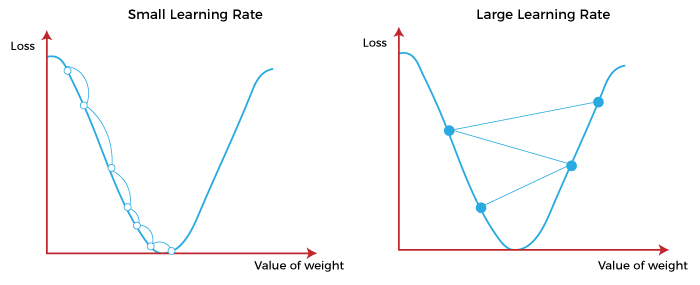

At the same time, a low learning rate shows the small sizes, which compromises overall efficiency but gives the advantages of more precision.

**So you need to find the Optimal/Goldilocks Learning Rate, for your curve, where gradient descent reaches the minimum point in the fewest number of steps.**

### What is Cost-Function?

It calculates the difference between the expected output (actual value) and the predict output by the model.

--- The cost function respects this difference as a single real number.

**Note:** There is a slightly difference between the **loss function** and the **cost function**.

The Loss Function is the error of one training example, while cost function caluclates the average error across an entire training set. 

### Different Types of Gradient Descent

Based on the error in various training models(step size or learning rate), the Gradient Descent learning algorithm can be divided into:

1. **Batch Gradient Descent (Training Epoch)**

It is used to find the error for each point in the training set and update the model parameter values like weights and bias, after evaluating all training examples.

In simple words, it is greedy approach where we have to sum over all examples for each update.

2. **Stochastic Gradient Descent(SGD)**

In SGD, only training example is used to compute the gradient and update the parameters at each iteration.

This can be faster than batch gradient descent but may lead to more noise in the updates.

3. **Min-batch Gradient Descent**

In Mini-batch gradient descent a small batch of training examples is used to compute the gradient and update the parameters at each iteration.

It can be faster than batch gradient descent and less noisy than Stochastic Gradient Descent.

### Why do use Gradient Descent even when we have OLS (Ordinary Least Squares) Multiple and Simple Linear Regression available?

While OLS provides closed-form solution for linear regression, Gradient Descent (GD) is computationally cheaper (faster) in handling multivariate cases seamlessly and preffered for high-dimensional problems, scability to handle hug data, and adaptability to complex scenarios (eg., neural networks).

### Batch Gradient Descent:

Let's continue, to build an approximation class that will help us in finding the betas(Coefficients and intercept) values of our Multiple Linear Regression Model. We will start with **Batch Gradient Descent**. For which i will using the Diabetes dataset make our own GDRegressor and will validate it with Sklearn LinearRegression.

### Importing Dataset

In [2]:
from sklearn.datasets import load_diabetes

In [4]:
(inputs, target)= load_diabetes(return_X_y= True)

In [5]:
print("Input.shape", inputs.shape)
print("Target.shape", target.shape)

Input.shape (442, 10)
Target.shape (442,)


### Splitting data into train and test datasets

In [6]:
from sklearn.model_selection import train_test_split

In [28]:
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs, target, test_size=0.2, random_state=42)

In [29]:
print("train_inputs:", train_inputs)
print("/n")
print("train_shape:", train_inputs.shape)

train_inputs: [[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]
/n
train_shape: (353, 10)


**Note:** It is very advisable to Standarize your dataset before applying Linear Models to reduce Time Complexity by approaching fast towards the decent.

Here, I'm not applying DataStandardization because the dataset is already in Similiar Range of all the axis.

**Since, Batch Gradient descent requires the values of Learning rate and epochs. I am first applying the sklearn's LinearRegresssion for better implementation of our model.**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
mlr= LinearRegression()
mlr.fit(train_inputs, train_target)

LinearRegression()

In [11]:
print("MLR Coeeffients:", mlr.coef_)
print("\n")
print("MLR intercept:", mlr.intercept_)

MLR Coeeffients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


MLR intercept: 151.34560453985995


### Building our own **Batch Gradient Descent** Class

In [12]:
import numpy as np

In [36]:
class BatchGDRegressor():
    
    def __init__(self, learning_rate = 0.01, epochs = 200):
        self.coeff = None
        self.intcpt = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Creating 'fit' Function
    def fit(self, train_inputs, train_target):
        
        # In Multiple Linear Regression, it is advisable to choose the starting point of intercept = 0 and coeffients = 1
        
        # Staring with initializing intercept = 0  
        self.intcpt = 0
        
        # Staring with initializing coefficients = 1
        self.coeff = np.ones(train_inputs.shape[1]) # Using train_inputs.shape[1] for the number of features
        
        # Starting iteration loop 
        for i in range(self.epochs):
            
            # Calculating the derivative of intercept values
            y_hat = np.dot(train_inputs, self.coeff) + self.intcpt
            
            intercept_derivative = -2 * np.mean(train_target - y_hat)
            
            # Updating all the intercept values
            self.intcpt = self.intcpt - (self.learning_rate * intercept_derivative)
            
            # Calculating the derivative of intercept values
            coeff_derivative = -2 * np.dot((train_target - y_hat), train_inputs)/ train_inputs.shape[0]
        
            # Updating all the intercept values
            self.coeff = self.coeff - (self.learning_rate * coeff_derivative)
        
    @property
    def coefficients(self):
        if self.coeff is not None:
            return self.coeff
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.intcpt is not None:
            return self.intcpt
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_inputs):
        return np.dot(test_inputs, self.coeff) + self.intcpt
    
    
    # R2 - scoring for Metric Evaluation 
    def score(self, test_inputs, test_target):
        predictions = self.predict(test_inputs)
        r2 = r2_score(test_target, predictions)
        return r2

In [39]:
# Define the range of values for learning_rate and epochs
learning_rates= [0.2, 0.3, 0.5, 0.01, 0.001, 0.0001, 0.002, 0.55]
epoch_values= [200, 500, 1000]

best_params= {"learning_rate": None, "Epochs": None}
best_score= float("inf") #Initialize with a high value

for lr in learning_rates:
    for epoch in epoch_values:
        bgdr = BatchGDRegressor(learning_rate=lr, epochs=epoch)
        bgdr.fit(train_inputs, train_target)
        current_score= bgdr.score(test_inputs, test_target)

        #Update best parameters if the current combination performs better
        if current_score < best_score:
            best_score= current_score
            best_params["learning_rate"]= lr
            best_params["epochs"]= epoch


print("Best Params:")
print(best_params)

Best Params:
{'learning_rate': 0.0001, 'Epochs': None, 'epochs': 200}


**Note:** We cannot use GridSearchCV for finding optimal value of Learning rate and Epochs as we cannot clone object of our Model for GridSearchCV because it is not a scikit-learn estimator and so it not implemented a "get_params" method.

In [40]:
bgdr.coefficients

array([  40.90499216, -210.68918642,  518.3736651 ,  328.64808621,
        -75.58207365, -122.90555243, -216.87374718,  144.80750496,
        382.64888694,  105.97925412])

In [41]:
bgdr.intercept

151.35335401286065

### Validation Results: Using R-squared (R²) score

In [42]:
y_pred= mlr.predict(test_inputs)
r2_score(test_target, y_pred)

0.45260276297191915

In [46]:
r2= bgdr.score(test_inputs, test_target)
print(f"R2 score on test data: {r2}")

R2 score on test data: 0.4585309132785289


Almost similiar R2 score of our data using our own BatchGDRegressor model as well as sklearn's LinearRegression.

### Advantages of Batch Gradient Descent:

1. It is effective for convex or relatively smooth error manifolds because it moves directly towards an optimal solution by taking a large step in the direction of negative gradient of the cost function.
2. It produces less noise in comparision to other gradient descents.
3. It produces stable gradient descent convergence, especially for Linear Data.
4. It is Computationally efficient for small dataset because as complete data is used for all training samples.

### Disadvantages of Batch Gradient descent:

However, it can be slow for large datasets because it computes the gradient and updates the parameter using the entire training dataset at each iteration. This can result in longer traning times and higher computational costs.

### Challenges with the Gradient Descent

Gradient Descent is one of the most popular methods for optimation problems, but it still also has some challenges as follows:

1. **Local Minima:**

For `convex problems`, gradient descent can find the `global minimum` easily.

For `non-convex problem`, it is sometimes difficult to find the global minimum, where the machine learning models can achieve best results.

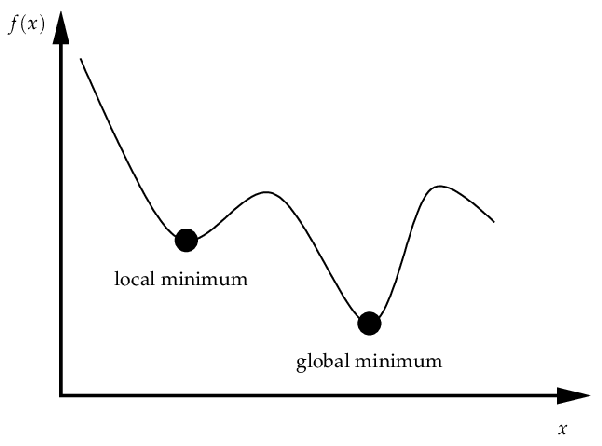

**Meaning**:  There occurs some scenarios that can show this stop, which can be the `local minimum`. Local minima generate the shape similiar to the global minimum, where the slope of the cost function increases on both sides of the current points. And, whenever the slope of the cost function is at zero or just close to zero, your model will stops learning further.

2. **Saddle Point:**

The saddle point problem in gradient descent occurs when the algorithm gets stuck in region of the cost function that resemble a saddle.

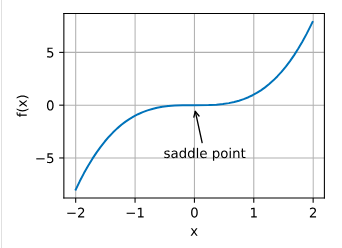

These points have very high slopes in some dimensions but are surrounded by zero slopes in others. As a result, gradient descent struggles to escape these regions, leading to slow convergence or even getting trapped.